<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba2/OSuM_Vezba2/OSuM_vezba_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obrada slike u medicini (BMI)

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82

## Laboratorijska vežba 2: Manipulacije nad 3D slikom

Potrebne biblioteke: pydicom, cv2, numpy, matplotlib.pyplot, matplotlib.widgets

In [1]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba2/OSuM_Vezba2

fatal: destination path 'OSuM' already exists and is not an empty directory.
/content/OSuM/OSuM_Vezba2/OSuM_Vezba2


In [2]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pydicom as dicom
import numpy as np
import cv2

from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep
from ipywidgets import interact, interactive

%matplotlib inline

### 1. Video iz DICOM fajla

1.1. Učitati DICOM fajl 0002.dcm i u posebnu promenljivu izvući atribut koji se odnosi na snimak, tj. sekvencu snimaka u ovom primeru. Koje su dimenzije te promenljive? Koji je modalitet snimanja u pitanju?

In [4]:
pd = dicom.dcmread('0002.DCM')
im = pd.pixel_array

1.2. Reorganizovati redosled dimenzija tako da se dimenzija koja se odnosi na vreme nalazi na poslednjem mestu. (Ovaj korak nije neophodan.)

In [5]:
im = np.swapaxes(im, 0, 1)
im = np.swapaxes(im, 1, 2)

1.3. Sačuvati učitanu angiografsku sekvencu u video fajl videoXA.avi.

In [6]:
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 10  # frame rate
frame_size = (im.shape[0], im.shape[1])  # dimeznije frejma; ako je izostavljen korak 1.2 prilagoditi ovaj deo
isColour = 0

# Video Writer objekat
video_out = cv2.VideoWriter('videoXA.avi', fourcc, fps, frame_size, isColour)

# zapisivanje frejm po frejm
for i in range(im.shape[2]):
    video_out.write(im[:, :, i])

video_out.release()

1.4. Prikazati video napravljen u prethodnom koraku.

In [7]:
from moviepy.editor import *

In [8]:
path="/content/OSuM/OSuM_Vezba2/OSuM_Vezba2/videoXA.avi" 

clip=VideoFileClip(path)
clip.ipython_display(width=280)


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### 2. Učitavanje 3D slike

2.1. Napraviti novi modul slika_3d.py i u njemu funkciju imread_3d za učitavanje 3D slike u formatu .img sa propratnih .hdr fajlom.

In [9]:
import numpy as np

def imread_3d(img_path, hdr_path):
    f_img = open(img_path, 'rb')
    f_hdr = open(hdr_path, 'rb')

    img = np.fromfile(f_img, np.dtype('uint16'))
    f_hdr.seek(40)  # postavljanje pointera na zeljenu lokaciju
    hdr = np.fromfile(f_hdr, np.dtype('uint16'))

    ndims = hdr[0]
    im_dims = hdr[1:ndims + 1]
    image = img.reshape(im_dims)

    f_img.close()
    f_hdr.close()

    return image

2.2. U glavnom modulu učitati sliku iz fajlova 01006_t1_cma.img i 01006_t1_cma.hdr. Kojih dimenzija je ova slika?

In [10]:
import slika_3d

im = slika_3d.imread_3d('01006_t1_cma.img', '01006_t1_cma.hdr')
im = im.astype(np.uint8)

2.3. Prikazati presek ove 3D slike u xy ravni, za z=100. Obratiti pažnju da je redosled dimenzija (z,x,y). Koji modalitet snimanja je u pitanju?

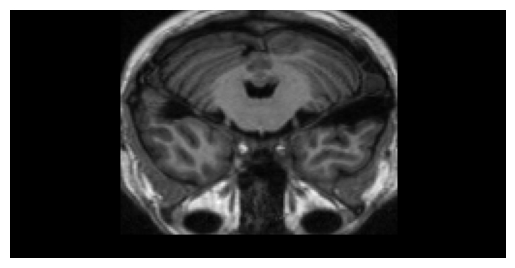

In [11]:
import matplotlib.pyplot as plt

z = 100
im_z = im[z, :, :]
plt.figure(1)
plt.imshow(im_z, cmap='gray', vmin=im_z.min(), vmax=im_z.max())
plt.axis('off')
plt.show()

### 3. GUI za prikaz 3D slike u 3 projekcije 

GUI za jedanu dimenziju (prikaz_z.py):

3.1. Prikazati presek 3D MRI slike u xy ravni na jednom subplot-u.

In [12]:
def plot_zproj(z):
  im_z = im[z, :, :]
  plt.figure(1)
  plt.imshow(im_z, cmap='gray', vmin=im_z.min(), vmax=im_z.max())
  plt.axis('off')
  plt.show()

interactive_plot = interactive(plot_zproj,z=(0,im.shape[0]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=127, description='z', max=255), Output()), _dom_classes=('widget-interac…

3.3. Definisati callback funkciju koja definiše akciju koja se dešava na promenu vrednosti slajdera. Pozvati tu funkciju.
GUI za 3 dimenzije:


Funkcija interactive to radi.

3.4. U modulu slika_3d.py napraviti funkciju imshow_slice koja prikazuje 3D sliku u sva tri preseka. U okviru nje definisati slajdere za promenu vrednosti preseka po svim dimenzijama.

3.5. U glavnom modulu definisati callback funkcije za sva tri preseka.

3.6. Iskoristiti matplotlib podmodul gridspec za organizaciju subplot-ova.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

im = slika_3d.imread_3d('01006_t1_cma.img', '01006_t1_cma.hdr')
im = im.astype(np.uint8)

def plot3d(z, x, y):
  fig = plt.figure()
  gs = fig.add_gridspec(2, 2)
  ax_z = fig.add_subplot(gs[0, 0])
  ax_x = fig.add_subplot(gs[1, 0])
  ax_y = fig.add_subplot(gs[:, 1]) 

  ax_z.imshow(im[z, :, :], cmap='gray', vmin=im[z, :, :].min(), vmax=im[z, :, :].max())
  ax_x.imshow(im[:, x, :], cmap='gray', vmin=im[:, x, :].min(), vmax=im[:, x, :].max())
  ax_y.imshow(im[:, :, y], cmap='gray', vmin=im[:, :, y].min(), vmax=im[:, :, y].max())
  plt.show()

interactive_plot = interactive(plot3d, z=(0,im.shape[0]-1),x=(0,im.shape[1]-1), y=(0, im.shape[2]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=127, description='z', max=255), IntSlider(value=63, description='x', max…

### 4. Koordinate na kojima se nalazi sadržaj slike

4.1. Napraviti funkciju koordinate u modulu slika_3d.py koja pronalazi početnu i krajnju koordinatu na kojima se nalazi sadržaj slike. Očitati vrednosti koordinata na kojima počinje i na kojima se završava sadržaj slike, za sve tri dimenzije. Da li se očitane vrednosti slažu sa vrednostima koje su dobijene iz funkcije?

In [14]:
def koordinate(im, dim):
    c = 1
    # prolaz kroz svaki presek dimenzije dim
    for i in range(im.shape[dim]):
        if dim == 0:
            tmp = im[i, :, :]
        elif dim == 1:
            tmp = im[:, i, :]
        elif dim == 2:
            tmp = im[:, :, i]

        # ukoliko ima makar jedan piksel cija vrednost nije 0 - detektovan sadrzaj slike;
        if tmp.any() and c == 1:
            pocetak = i
            c = 2  # da se ne prebrise koordinata pocetka u sledecoj iteraciji

        # krajnja koordinata se trazi samo ako je vec pronadjen pocetak (c==2)
        if not tmp.any() and c == 2:
            kraj = i-1  # poslednja koordinata na kojoj se nalazio sadrzaj
            break

    return pocetak, kraj

In [15]:
import numpy as np
import matplotlib.pyplot as plt

im = slika_3d.imread_3d('01006_t1_cma.img', '01006_t1_cma.hdr')
im = im.astype(np.uint8)

def plot3d(z, x, y):
  fig = plt.figure()
  gs = fig.add_gridspec(2, 2)
  ax_z = fig.add_subplot(gs[0, 0])
  ax_x = fig.add_subplot(gs[1, 0])
  ax_y = fig.add_subplot(gs[:, 1]) 

  ax_z.imshow(im[z, :, :], cmap='gray', vmin=im[z, :, :].min(), vmax=im[z, :, :].max())
  ax_x.imshow(im[:, x, :], cmap='gray', vmin=im[:, x, :].min(), vmax=im[:, x, :].max())
  ax_y.imshow(im[:, :, y], cmap='gray', vmin=im[:, :, y].min(), vmax=im[:, :, y].max())
  plt.show()

interactive_plot = interactive(plot3d, z=(koordinate(im, 0)),x=(koordinate(im, 1)), y=(koordinate(im, 2)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=138, description='z', max=205, min=72), IntSlider(value=60, description=…